# A billion stars in the Jupyter Notebook
## Kapteyn Lunchtalk - 2018

In [1]:
1+1

2

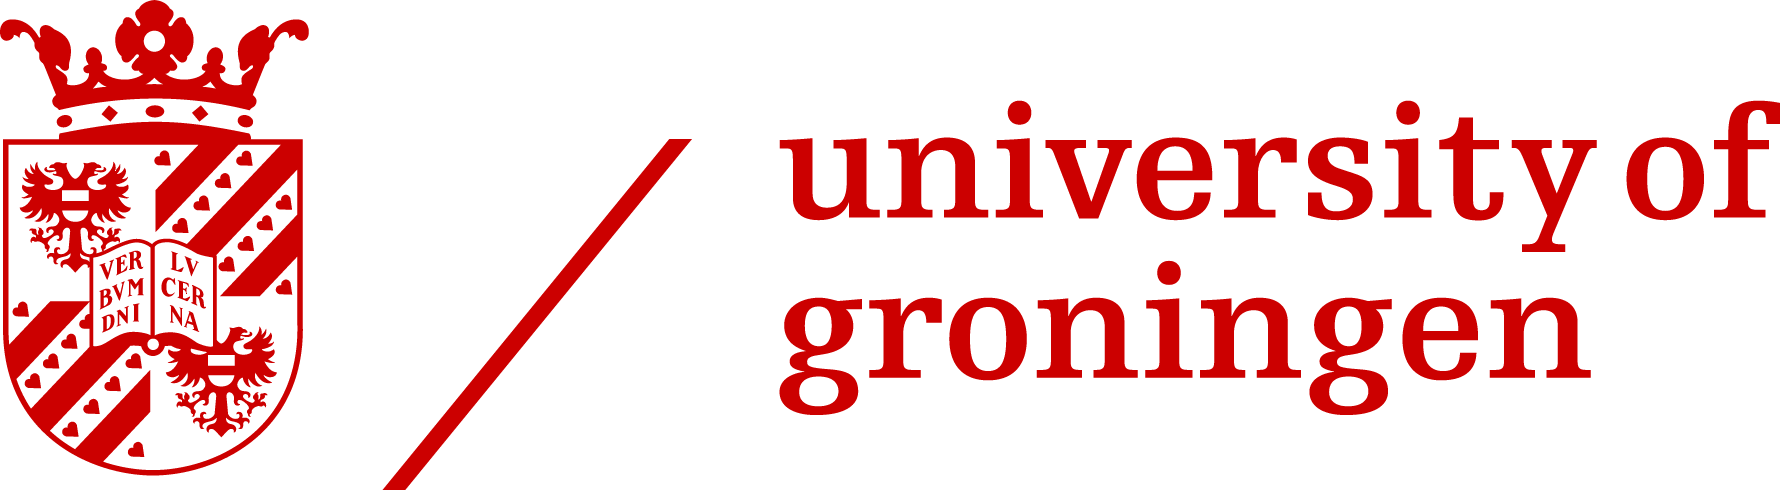

In [2]:
import IPython.display
IPython.display.Image(filename="logo.gif")

$ E \approx mc^2$

In [3]:
import vaex
import numpy as np
import matplotlib.pylab as plt
np.warnings.filterwarnings('ignore')

plt.style.use('bigfont')
%matplotlib inline

# Step 0: reading in data
vaex reads 'anything':
 * `ds = vaex.open('super_fast.hdf5')`
 * `ds = vaex.open('gadget_is_fine.hdf5')`
 * `ds = vaex.from_pandas(df)`
 * `ds = vaex.from_astropy_table(table)`
 * `ds = vaex.from_ascii('takes_hours.asc')`
 * `ds = vaex.from_csv('this_may_be_slow.csv')`
 * `ds = vaex.from_arrays(x=x, y=y)`

In [6]:
%%time
ds = vaex.open("/Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.hdf5")
!ls -lh /Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.hdf5

-rw-r--r--@ 1 maartenbreddels  staff    23G Mar 29  2017 /Users/maartenbreddels/datasets/nytaxi/nyc_taxi2015.hdf5
CPU times: user 12.4 ms, sys: 12.4 ms, total: 24.8 ms
Wall time: 152 ms


In [7]:
ds

In [27]:
ds.data.pickup_latitude

In [ ]:
ds.trip_distance

In [ ]:
np.log10(ds.trip_distance)

## 0 dimensional

In [8]:
ds.count()

146112989.0

In [9]:
ds.count(ds.pickup_latitude)

143807893.0

In [10]:
ds.mean(ds.pickup_latitude)

40.75060057537205

## 1 dimensional

In [11]:
ds.count(binby=ds.pickup_latitude, limits=[40.5, 41])

array([4.1000000e+01, 3.4000000e+01, 3.6000000e+01, 4.7000000e+01,
       1.0300000e+02, 1.6600000e+02, 7.2000000e+01, 8.3000000e+01,
       6.8000000e+01, 9.7000000e+01, 9.3000000e+01, 5.9000000e+01,
       1.2000000e+02, 8.4000000e+01, 1.0900000e+02, 1.6500000e+02,
       1.2700000e+02, 1.7300000e+02, 2.5300000e+02, 9.7000000e+02,
       7.9300000e+02, 1.6370000e+03, 1.2350000e+03, 1.0560000e+03,
       1.5380000e+03, 1.8220000e+03, 1.8260000e+03, 2.3030000e+03,
       2.4230000e+03, 3.7970000e+03, 3.8240000e+03, 4.6750000e+03,
       3.9890000e+03, 6.7790000e+03, 8.7990000e+03, 1.1145000e+04,
       7.0218900e+05, 2.0521540e+06, 3.3045600e+05, 3.2069000e+04,
       3.9121000e+04, 4.2237000e+04, 4.7513000e+04, 7.1552000e+04,
       9.8448000e+04, 1.7816800e+05, 2.2041600e+05, 2.3761300e+05,
       2.7993100e+05, 2.9166500e+05, 1.6898800e+05, 4.0306100e+05,
       1.3968290e+06, 1.4918390e+06, 2.1250450e+06, 2.6038870e+06,
       4.5289000e+06, 4.5949600e+06, 4.8476850e+06, 5.7141040e

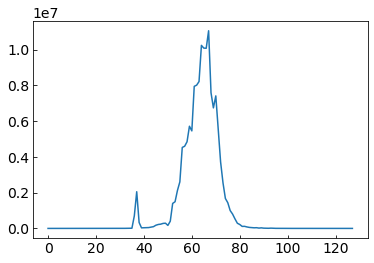

In [12]:
plt.plot(_)

## 2 dimensional

In [13]:
counts2d = ds.count(binby=[ds.pickup_longitude, ds.pickup_latitude], shape=128)
print(counts2d.shape)

(128, 128)


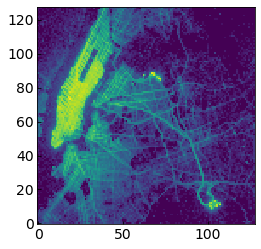

In [14]:
plt.imshow(np.log10(counts2d+1).T, origin='lower')

In [15]:
limits = ds.limits([ds.pickup_longitude, ds.pickup_latitude], "98%")
limits

[array([-74.03799976, -73.774866  ]), array([40.6379567 , 40.81379327])]

CPU times: user 1.52 s, sys: 58.4 ms, total: 1.57 s
Wall time: 339 ms


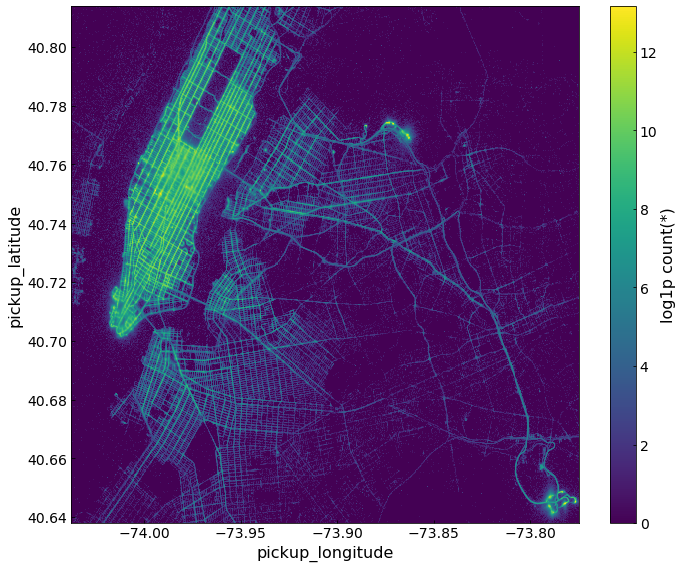

In [16]:
%%time
ds.plot(ds.pickup_longitude, ds.pickup_latitude, f="log1p",
        limits=limits, figsize=(10,8), shape=512, colormap="viridis")

In [ ]:
# %%timeit
# counts2d = ds.count(binby=["pickup_longitude", "pickup_latitude"], shape=128, limits=limits)#, limits=[[-90, 90], [-180, 180]])

## Where to pick up customers?

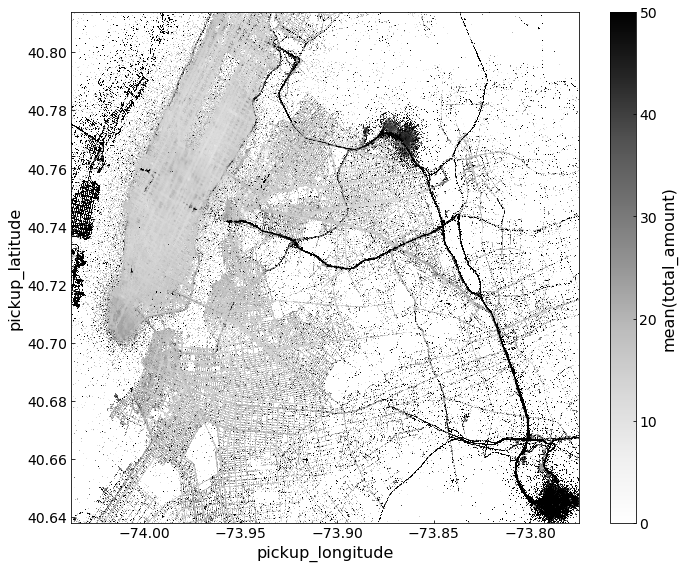

In [17]:
ds.plot(ds.pickup_longitude, ds.pickup_latitude, what=vaex.stat.mean(ds.total_amount),
        vmin=0, vmax=50, shape=512, figsize=(10,8), limits=limits, colormap="Greys")

In [18]:
ds.trip_distance.minmax()

array([-4.08401244e+07,  1.98623014e+08])

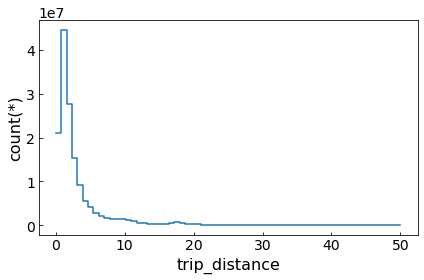

In [19]:
ds.plot1d(ds.trip_distance, limits=[0, 50])

In [20]:
# no memory copy! and not wasting 46 GB of memory
ds = ds[(ds.trip_distance > 0) & (ds.trip_distance < 40)]

In [21]:
ds.total_amount/ds.trip_distance

<vaex.expression.Expression(expressions='(total_amount / trip_distance)')> instance at 0x110319a58 [10.723270440251572, 5.3939393939393945, 6.0, 9.6, 5.433333333333334 ... (total 145169109 values) ... 8.8, 4.4, 3.8947368421052637, 5.000000000000001, 16.754716981132077] 

In [22]:
ds['ratio'] = ds.total_amount / ds.trip_distance

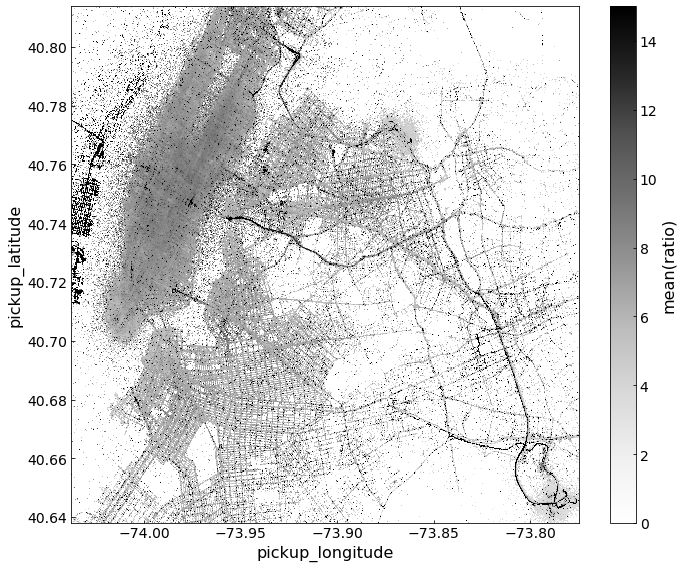

In [23]:
ds.plot(ds.pickup_longitude, ds.pickup_latitude,
         what=vaex.stat.mean(ds.ratio),
         vmin=0, vmax=15,
         shape=512, figsize=(10,8), limits=limits, colormap="Greys")

## A Billion stars in the notebook

In [24]:
# gaia = vaex.open("ws://gaia:9000/gaia-dr1")
import vaex
%matplotlib inline
gaia = vaex.open('/Users/maartenbreddels/datasets/gaia/gaia-dr1-minimal_f4.hdf5')

In [25]:
f"{len(gaia):,}"

'1,142,679,769'

CPU times: user 38 s, sys: 8.88 s, total: 46.9 s
Wall time: 16 s


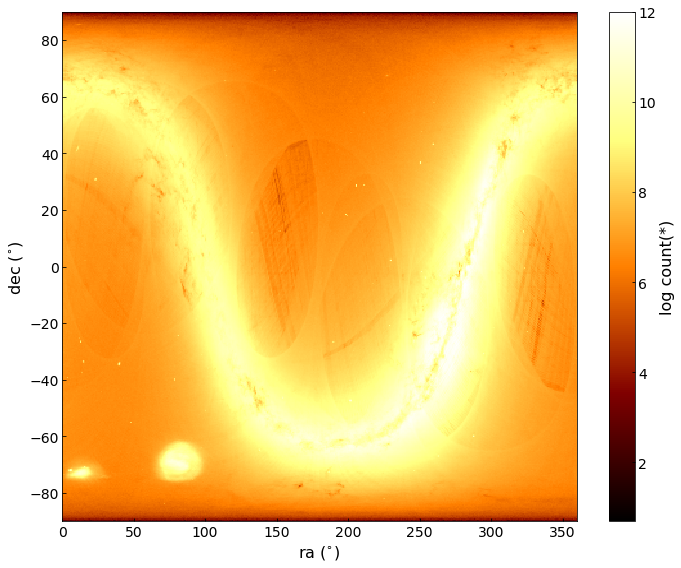

In [26]:
%%time
ra_dec_limits = [[0, 360], [-90, 90]]
gaia.plot("ra", "dec", limits=ra_dec_limits, f="log", figsize=(10,8), shape=400)
#plt.savefig('gaia-backup.png')